In [19]:
# Install any missing libraries (if needed)
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sentiment = pd.read_csv('/content/ds_Venkata_KusumaLatha_Chitikireddy/csv_files/sent.csv')  # Change to actual path after download
trades = pd.read_csv('/content/ds_Venkata_KusumaLatha_Chitikireddy/csv_files/historical_data - historical_data.csv')

# Preview

trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [21]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [22]:
sentiment.columns



Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [23]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [24]:
import pandas as pd
import os

# Setup directories (assuming datasets are already loaded from these paths)
root_dir = "/content/ds_Venkata_KusumaLatha_Chitikireddy"
csv_dir = os.path.join(root_dir, "csv_files")
out_dir = os.path.join(root_dir, "outputs")

os.makedirs(csv_dir, exist_ok=True)
os.makedirs(out_dir, exist_ok=True)

print(f"✅ Folder structure ready under: {root_dir}")



✅ Folder structure ready under: /content/ds_Venkata_KusumaLatha_Chitikireddy


In [25]:
# Convert trades timestamp (milliseconds) to datetime
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['trade_date'] = trades['Timestamp'].dt.floor('D')  # just the date part

# Convert sentiment date column to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Clean classification strings
sentiment['classification'] = sentiment['classification'].str.strip().str.capitalize()


In [26]:
# Clean 'Closed PnL' column
trades['Closed PnL'] = trades['Closed PnL'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


In [27]:
merged = trades.merge(sentiment, left_on='trade_date', right_on='date', how='inner')

# Drop rows where Closed PnL is missing
merged = merged.dropna(subset=['Closed PnL'])


In [28]:
merged.to_csv(os.path.join(csv_dir, 'merged_data_cleaned.csv'), index=False)


/tmp/ipython-input-1847599625.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='coolwarm')


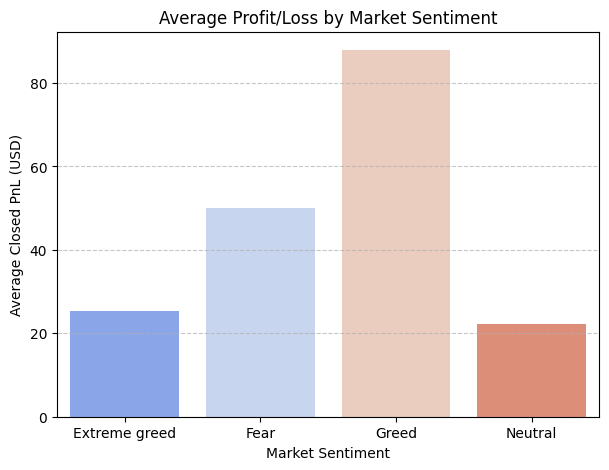

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_pnl = merged.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='coolwarm')
plt.title('Average Profit/Loss by Market Sentiment')
plt.ylabel('Average Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(out_dir, 'avg_pnl_by_sentiment.png'))
plt.show()


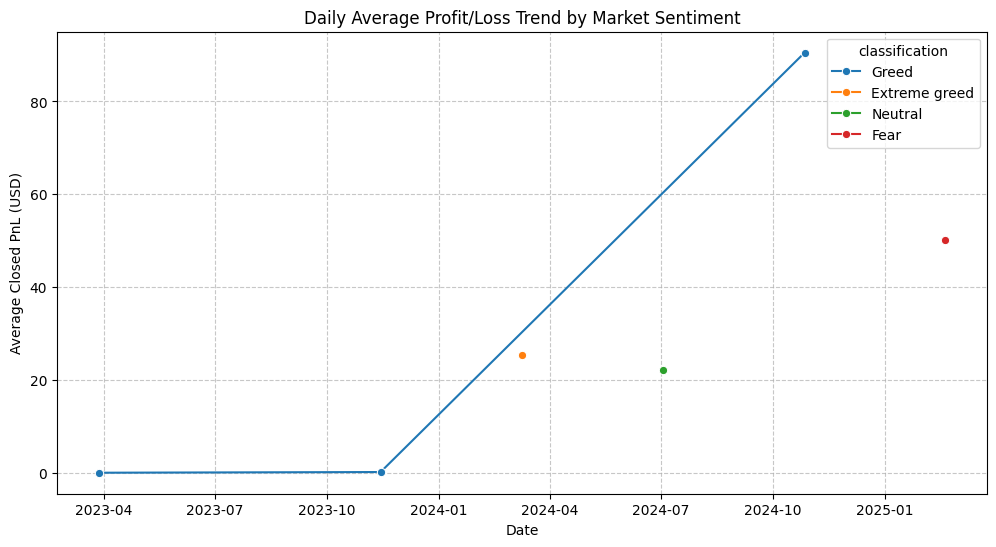

In [30]:
daily_pnl = merged.groupby(['trade_date', 'classification'])['Closed PnL'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_pnl, x='trade_date', y='Closed PnL', hue='classification', marker='o')
plt.title('Daily Average Profit/Loss Trend by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(os.path.join(out_dir, 'daily_pnl_trend.png'))
plt.show()



/tmp/ipython-input-1539969192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette='magma')


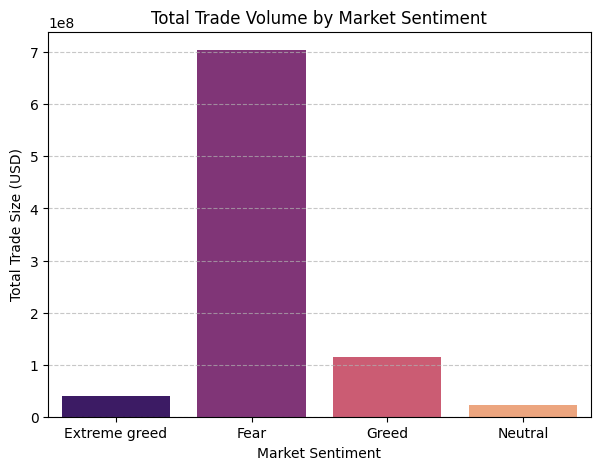

In [31]:
volume_by_sentiment = merged.groupby('classification')['Size USD'].sum().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', palette='magma')
plt.title('Total Trade Volume by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Trade Size (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(out_dir, 'volume_by_sentiment.png'))
plt.show()


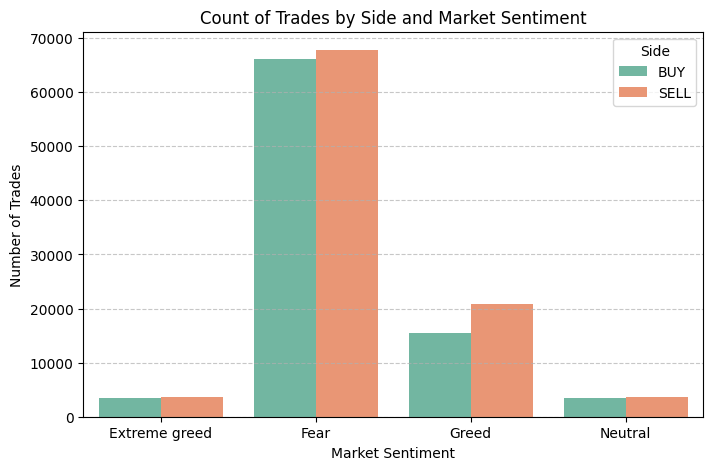

In [32]:
trade_counts = merged.groupby(['classification', 'Side']).size().reset_index(name='count')
plt.figure(figsize=(8,5))
sns.barplot(data=trade_counts, x='classification', y='count', hue='Side', palette='Set2')
plt.title('Count of Trades by Side and Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(out_dir, 'trade_counts_by_side_sentiment.png'))
plt.show()



In [33]:
from scipy.stats import pearsonr, ttest_ind

# Map sentiment classification to numeric scores (optional)
sentiment_map = {'Fear': 1, 'Extreme Fear': 0, 'Greed': 2, 'Extreme Greed': 3}
merged['sentiment_score'] = merged['classification'].map(sentiment_map).fillna(-1)

# Correlation (remove invalids)
valid_data = merged[(merged['sentiment_score'] >= 0) & (merged['Closed PnL'].notnull())]
corr, pval = pearsonr(valid_data['sentiment_score'], valid_data['Closed PnL'])
print(f"Correlation between sentiment score and Closed PnL: {corr:.3f} (p={pval:.4f})")

# T-test example: profits in Fear vs Greed
fear_pnl = merged[merged['classification']=='Fear']['Closed PnL']
greed_pnl = merged[merged['classification']=='Greed']['Closed PnL']

t_stat, t_pval = ttest_ind(fear_pnl.dropna(), greed_pnl.dropna(), equal_var=False)
print(f"T-test Fear vs Greed Closed PnL: t={t_stat:.3f}, p={t_pval:.4f}")


Correlation between sentiment score and Closed PnL: 0.016 (p=0.0000)
T-test Fear vs Greed Closed PnL: t=-5.805, p=0.0000
